In [1]:
import tweepy
from tweepy import OAuthHandler
import re
import pickle
  

In [2]:
# load sensitive info
from dotenv import load_dotenv
import os
load_dotenv()
consumer_key = os.getenv('TWITTER_CONSUMER_KEY')
consumer_secret = os.getenv('TWITTER_CONSUMER_SECRET')
access_token = os.getenv('TWITTER_ACCESS_TOKEN')
access_secret = os.getenv('TWITTER_ACCESS_SECRET')

In [3]:
# get api
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [4]:
# read our own timeline
for status in tweepy.Cursor(api.home_timeline).items(10):
    # Process a single status
    print(status.text)

Bicycle speed record smashed at 180 mph - yike! https://t.co/nNfIwvWHS6
RT @VanHooserLab: @vanhoosr Steve got a mention for Peer Review Week from Journal of Neuroscience! https://t.co/a9QQCwQhAG
New job posting added: Princeton University has an opening for human cognitive neuroscience (including, but not lim… https://t.co/3axNKfkmdP
Three faculty job postings in my department @UBiologySchool @UUtah

Mol Biology /  Biochem (deadline 10/1)… https://t.co/foXUm9m3Ds
@carolineleiwee So true - I do the same. Twitter is great but I want to encourage DEEP reading and critical evaluat… https://t.co/ORG8Fg0OMD
Job application reminder: University of Chicago has an opening for neuronal circuits, behavior DUE  https://t.co/NAgcsx6tkq
Job application reminder: University of Oregon has an opening for Motor control, biomechanics, neurophysiology DUE… https://t.co/9EvzwEpA1l
Job application reminder: Virginia Tech has an opening for Developmental psychology and decision neuroscience DUE B… https://t.

In [5]:
# username
user = api.me()
print (user.name)

Xiuye (Sue) Chen


In [11]:
m = tweepy.Cursor(api.search, "😍", lang="en").items(1)
type(m)

tweepy.cursor.ItemIterator

In [35]:
%%time
import pickle
keyword = "😍" # "😋"
numberOfTweets = 5000

# Empty Array 
itemlist=[]  

n = 0;
for tweet in tweepy.Cursor(api.search, keyword, lang="en").items(numberOfTweets):
    dc = tweet._json
    str = dc.get('text')
    #list_all = re.split('( )', str) # this is a list
    #list_a = re.findall(r'[@]\S*', str) #[2,4,7]
    #list_b = [1,2,3,4,5,6]
    #list_a = [n for n in list_a if n not in list_b]

    # remove the following
    #print(re.findall(r'[@]\S*', str)) # Twitter user names
    #print(re.findall(r'[RT]\S*', str)) # "RT"
    
    itemlist.append(str) 
    n = n+1
    if n % 100 == 0:
        print(n)


# save file
with open('outfile😍', 'wb') as fp:
    pickle.dump(itemlist, fp)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


TweepError: Twitter error response: status code = 429

In [36]:

# save file
with open('outfile😍', 'wb') as fp:
    pickle.dump(itemlist, fp)
    

In [15]:
# load file
with open ('outfile', 'rb') as fp:
    itemlist2 = pickle.load(fp)

In [26]:
#itemlist2[0:3]
print(re.findall(r'[@]\S*', itemlist2[0]))

['@flowerboymir:']


In [6]:
# search for keyword
keyword = "😍" # "😋"
numberOfTweets = 10
for tweet in tweepy.Cursor(api.search, keyword, lang="en").items(numberOfTweets):
    print("=====")
    print(tweet.text)

=====
RT @Lammunicorn: @Hettyfrenken Happy evening to you👍⚘⚘😍
=====
@BlancoGoGo Looking fabulous GG 😘
A Mexican expose 😍
#WinkOrWave
=====
@AEWeatherill @BethMiller101 I’ve been waiting for this announcement for months 😭😍
=====
RT @Tshepo_Berry: My darling @22_Gracey come see 😍🔥 https://t.co/XYqrcvcJ0c
=====
@RoseEllenDix @Waterstones i'm so excited for the book😍not long now ahh
=====
RT @Watch_LFC: 😍 | What a photo, @andrewrobertso5 https://t.co/9jYS521Uoj
=====
RT @thugprolly: @shialacunt The only angle I look cute in this dress but the colour 😍 https://t.co/sKZMmYJ1sh
=====
@shardhakapoors love you😍
=====
@Tshepang_Molapo Beautiful😍
=====
24 days!! Can't wait to marry you. 😍😘💍 https://t.co/LVhypoRr9u


In [7]:
dc = tweet._json
print(dc.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])


In [8]:
str = dc.get('text')
print(str)

import re
s2 = re.split('( )', str) # this is a list
print(s2)
#print(s2.startswith('@'))
#[ t for t in s2 if t.startswith('s') ]
print(re.findall(r'[@]\S*', str))
print(re.findall(r'[RT]\S*', str))

24 days!! Can't wait to marry you. 😍😘💍 https://t.co/LVhypoRr9u
['24', ' ', 'days!!', ' ', "Can't", ' ', 'wait', ' ', 'to', ' ', 'marry', ' ', 'you.', ' ', '😍😘💍', ' ', 'https://t.co/LVhypoRr9u']
[]
['Rr9u']


In [9]:
from time import sleep
from datetime import datetime
from textblob import TextBlob #For Sentiment Analysis
import matplotlib.pyplot as plt


In [11]:
polarity_list = []
numbers_list = []
number = 1

In [12]:
# search for keyword
keyword = "cake"
numberOfTweets = 10
for tweet in tweepy.Cursor(api.search, keyword, lang="en").items(numberOfTweets):
    try:
        analysis = TextBlob(tweet.text)
        analysis = analysis.sentiment
        polarity = analysis.polarity
        polarity_list.append(polarity)
        numbers_list.append(number)
        number = number + 1
    except tweepy.TweepError as e:
        print(e.reason)

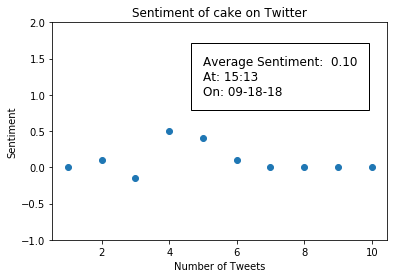

In [27]:
axes = plt.gca()
axes.set_ylim([-1, 2])
plt.scatter(numbers_list, polarity_list)

averagePolarity = (sum(polarity_list))/(len(polarity_list))
averagePolarity = "{0:.2f}".format(averagePolarity)
#averagePolarity = "{0:.0f}%".format(averagePolarity * 100)
time  = datetime.now().strftime("At: %H:%M\nOn: %m-%d-%y")
plt.text(5, 1, "Average Sentiment:  " + str(averagePolarity) + "\n" + time, fontsize=12, bbox = dict(facecolor='none', edgecolor='black', boxstyle='square, pad = 1'))

plt.title("Sentiment of " + keyword + " on Twitter") 
plt.xlabel("Number of Tweets")
plt.ylabel("Sentiment")
plt.show()